In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1- Data Cleaning

In [5]:
df= pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [25]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
a=dict()
for col in df:
    a[col]= df[col].isnull().sum()/len(df[col])*100

In [9]:
for key,value in a.items():
    if a[key]>=40:
        print(key,value)

Alley 93.76712328767123
FireplaceQu 47.26027397260274
PoolQC 99.52054794520548
Fence 80.75342465753424
MiscFeature 96.30136986301369


In [10]:
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns',inplace=True)

#### Correlation matrix

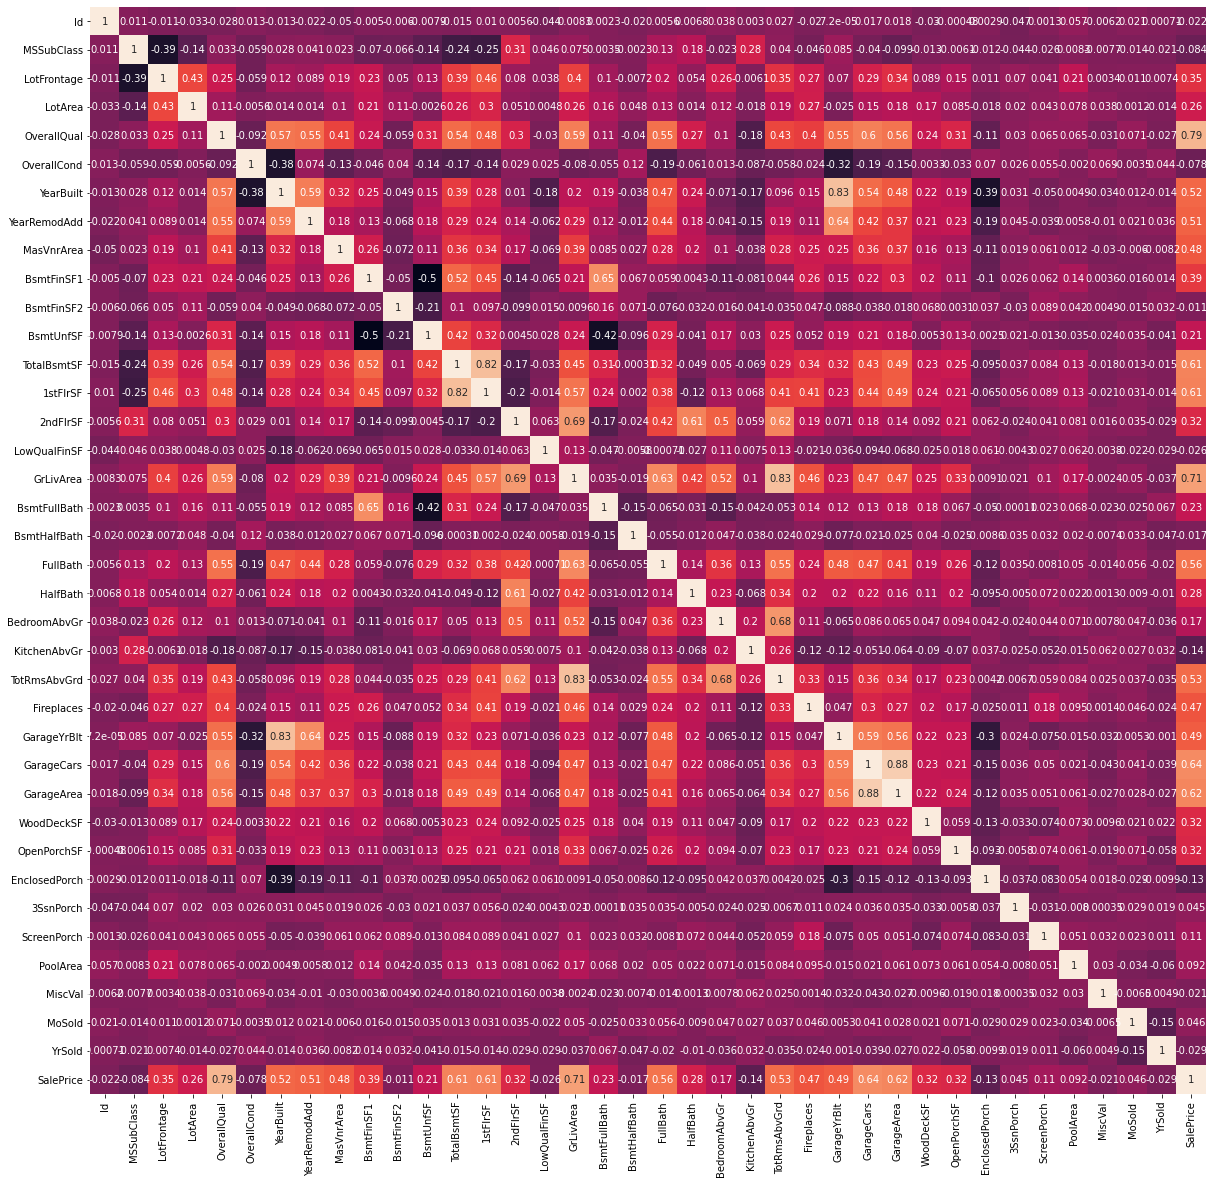

In [11]:
fig ,ax = plt.subplots(figsize=(20,20))
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True, cbar = False)
plt.show()

In [12]:
df.drop(['TotalBsmtSF','1stFlrSF','GrLivArea','MSSubClass','GarageCars','GarageArea','OverallCond','EnclosedPorch'],axis='columns',inplace=True)

In [13]:
print(df.columns)

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleC

<AxesSubplot:>

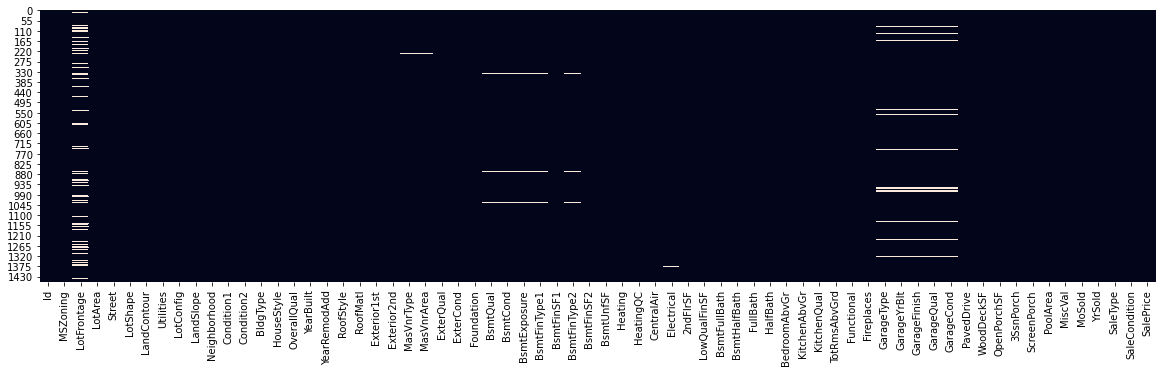

In [14]:
fig,ax= plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [15]:
df.drop(['LotFrontage'],axis='columns',inplace=True)

<AxesSubplot:>

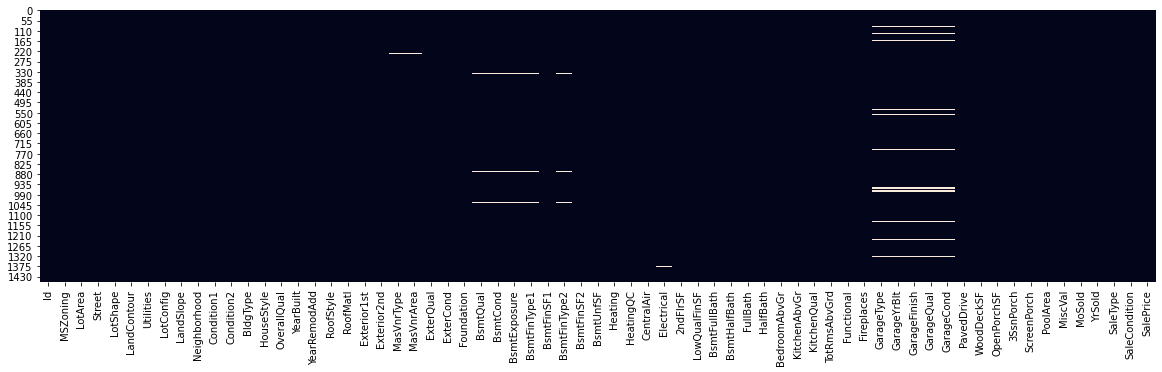

In [16]:
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
import sklearn.impute.SimpleImputer

In [110]:
imp_test = sklearn.impute.SimpleImputer(strategy='median')

In [126]:
imp_test.fit(test_data)

SimpleImputer(strategy='median')

In [19]:
df['MasVnrArea'].isnull().sum()

8

In [20]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)

In [21]:
df['MasVnrArea'].isnull().sum()

0

<AxesSubplot:>

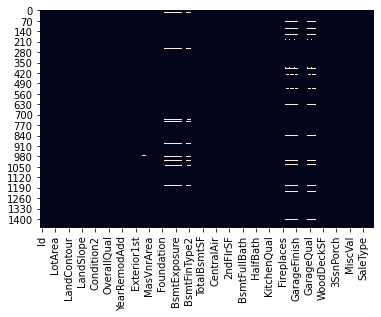

In [24]:
sns.heatmap(df.isnull(),cbar=False)

In [25]:
df['MasVnrType'].isnull().sum()

8

In [26]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [27]:
df['MasVnrType'].fillna('BrkCmn',inplace=True)

In [28]:
df['MasVnrType'].isnull().sum()

0

<AxesSubplot:>

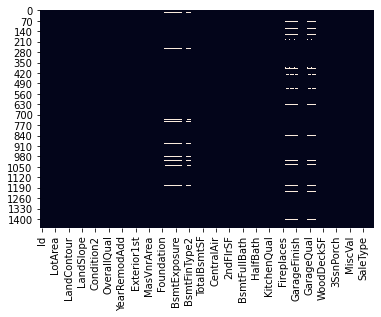

In [29]:
sns.heatmap(df.isnull(),cbar=False)

In [30]:
df['BsmtQual'].isnull().sum()

37

In [31]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [33]:
df['BsmtQual'].mode()

0    TA
dtype: object

In [32]:
df['BsmtQual'].fillna('TA',inplace=True)

In [34]:
df['BsmtQual'].isnull().sum()

0

<AxesSubplot:>

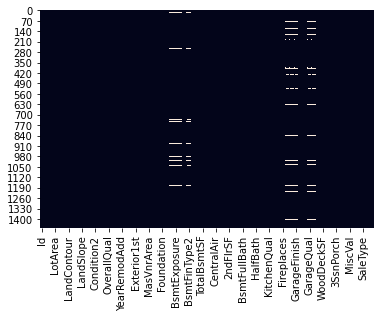

In [35]:
sns.heatmap(df.isnull(),cbar=False)

In [36]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [38]:
df['BsmtCond'].fillna('TA',inplace=True)

In [39]:
df['BsmtCond'].isnull().sum()

0

In [41]:
df.drop(['MSSubClass','OverallCond','BsmtFinSF2','KitchenAbvGr','EnclosedPorch'],axis='columns',inplace=True)

<AxesSubplot:>

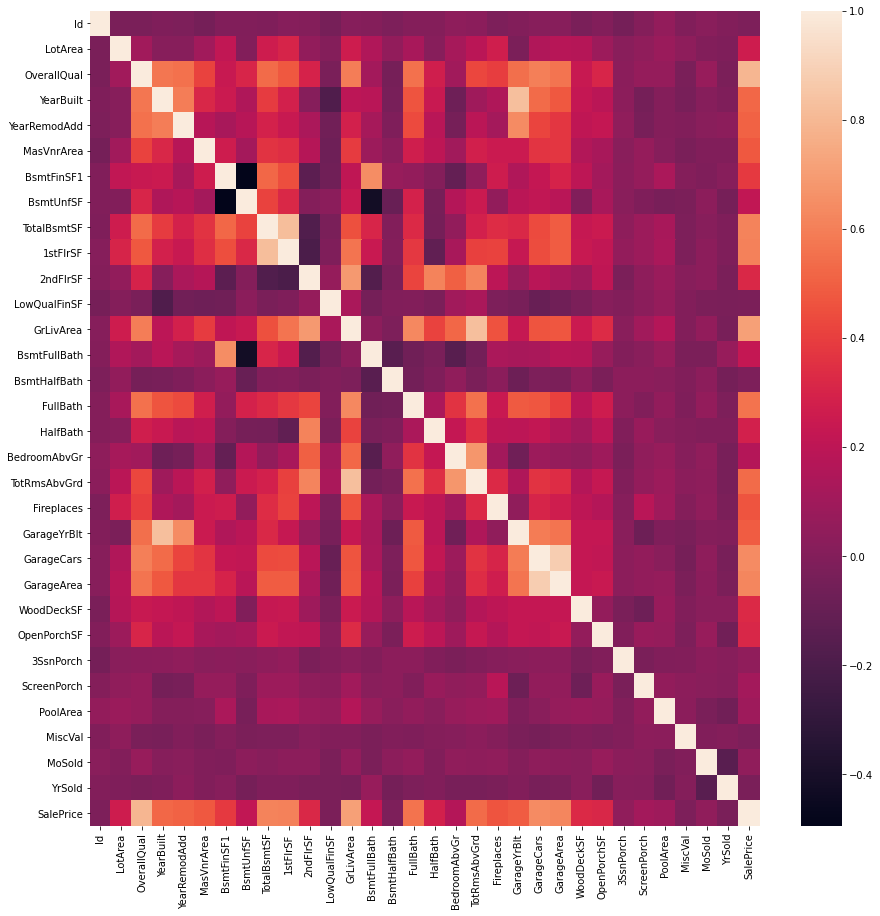

In [42]:
fig ,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr())

<AxesSubplot:>

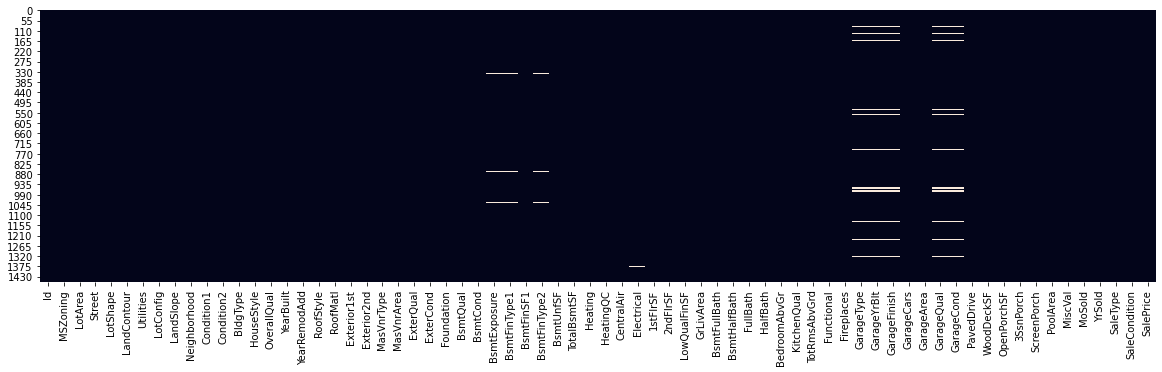

In [43]:
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [45]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [46]:
df['BsmtExposure'].mode()

0    No
dtype: object

In [47]:
df['BsmtExposure'].fillna('No',inplace=True)

In [48]:
df['BsmtExposure'].isnull().sum()

0

<AxesSubplot:>

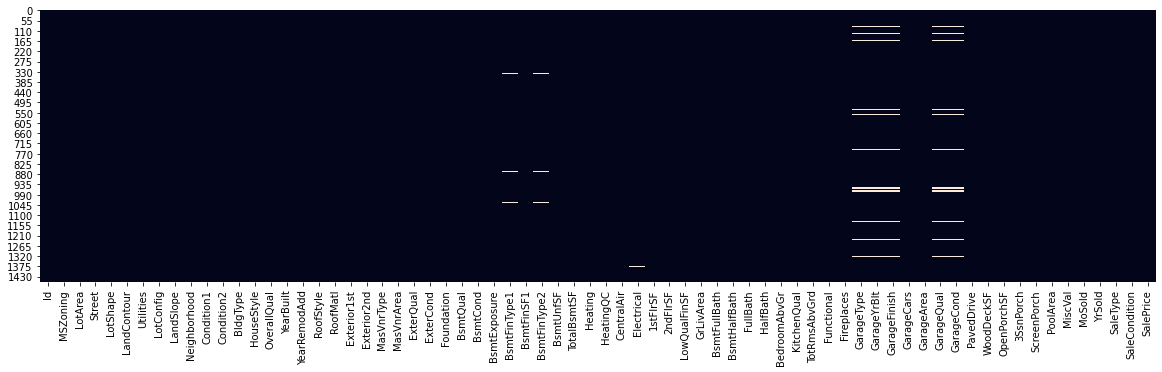

In [50]:
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [51]:
df['BsmtFinType1'].isnull().sum()

37

In [52]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [53]:
df['BsmtFinType1'].mode()

0    Unf
dtype: object

In [54]:
df['BsmtFinType1'].fillna('Unf',inplace=True)

In [55]:
df['BsmtFinType1'].isnull().sum()

0

<AxesSubplot:>

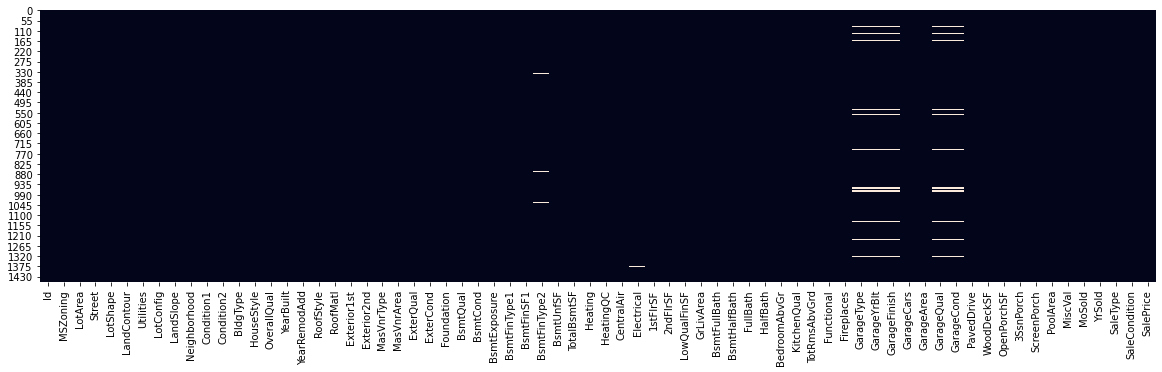

In [57]:
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [58]:
df['BsmtFinType2'].isnull().sum()

38

In [59]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [60]:
df['BsmtFinType2'].mode()

0    Unf
dtype: object

In [61]:
df['BsmtFinType2'].fillna('Unf',inplace=True)

In [62]:
df['BsmtFinType2'].isnull().sum()

0

<AxesSubplot:>

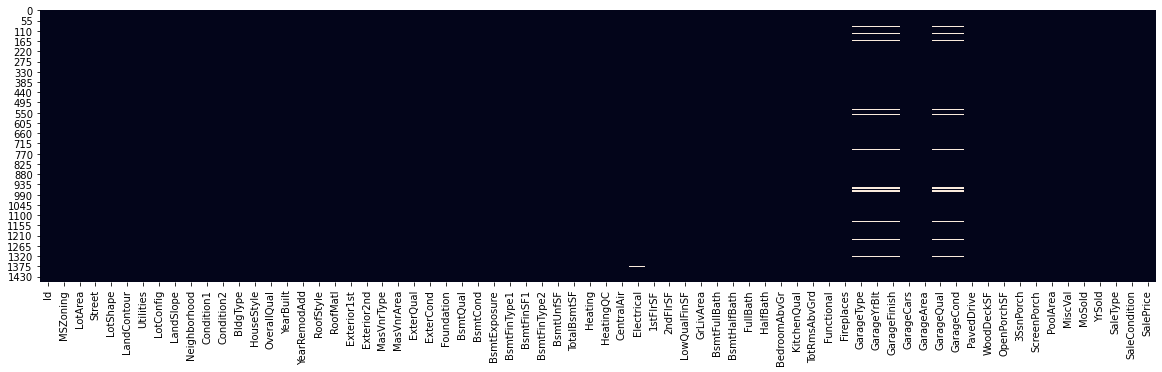

In [64]:
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [66]:
df['Electrical'].mode()

0    SBrkr
dtype: object

In [67]:
df['Electrical'].fillna('SBrkr',inplace=True)

In [68]:
df['Electrical'].isnull().sum()

0

In [77]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [69]:
df.GarageType.mode()

0    Attchd
dtype: object

In [70]:
df['GarageType'].fillna('Attchd',inplace=True)

In [74]:
df['GarageType'].isnull().sum()

0

In [75]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [77]:
df.GarageYrBlt.mean()

1978.5061638868744

In [80]:
df['GarageYrBlt'].fillna(1978.,inplace=True)

In [81]:
df['GarageYrBlt'].isnull().sum()

0

In [82]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [84]:
df['GarageFinish'].mode()

0    Unf
dtype: object

In [85]:
df['GarageFinish'].fillna('Unf',inplace=True)

In [86]:
df['GarageFinish'].isnull().sum()

0

<AxesSubplot:>

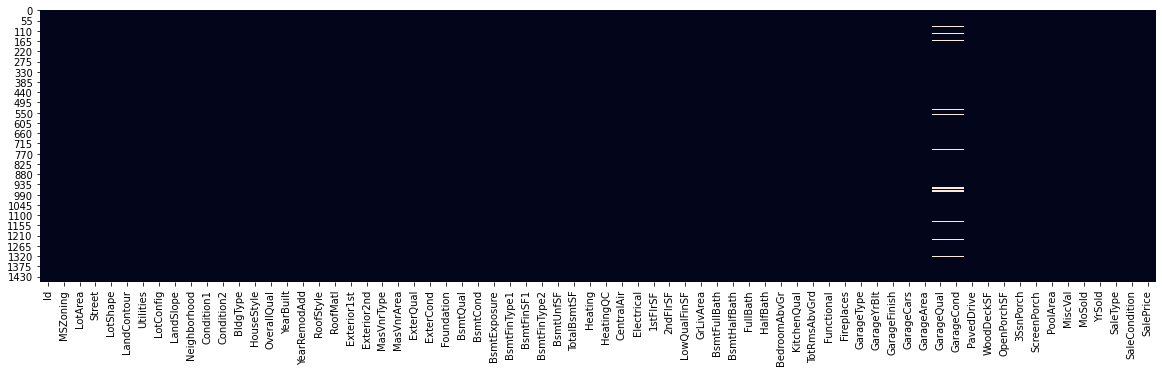

In [88]:
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False)

In [89]:
df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [90]:
df.GarageQual.mode()

0    TA
dtype: object

In [92]:
df.GarageQual.fillna('TA',inplace=True)

In [93]:
df.GarageQual.isnull().sum()

0

In [94]:
df.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [95]:
df.GarageCond.mode()

0    TA
dtype: object

In [96]:
df.GarageCond.fillna('TA',inplace=True)

In [97]:
df.GarageCond.isnull().sum()

0

<AxesSubplot:>

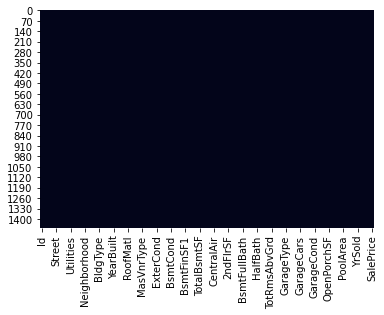

In [98]:
sns.heatmap(df.isnull(),cbar=False)

In [99]:
df.to_csv(r'C:\Users\shrik\kaggle\Houseprices\house-prices-advanced-regression-techniques\HousePred_cleaned.csv')

# Part 2

In [3]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df= pd.read_csv('house-prices-advanced-regression-techniques/Housepred_cleaned.csv')

In [6]:
df.head()

,Unnamed: 0,Id,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
df.drop(['Unnamed: 0','Id'],axis='columns',inplace=True)

In [8]:
df.head()

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,35,0,0,0,0,2,2006,WD,Abnorml,140000
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,12,2008,WD,Normal,250000


# Part 3 Random Forest Model

In [9]:
from sklearn.model_selection import train_test_split

In [44]:
'''from sklearn.preprocessing import LabelEncoder
target_feature = 'Most Active Current News Type'
#use encoder and transform
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data_frame[target_feature].values)
data_frame[target_feature] = pd.Series(encoded_values, index=data_frame.index)'''

"from sklearn.preprocessing import LabelEncoder\ntarget_feature = 'Most Active Current News Type'\n#use encoder and transform\nencoder = LabelEncoder()\nencoded_values = encoder.fit_transform(data_frame[target_feature].values)\ndata_frame[target_feature] = pd.Series(encoded_values, index=data_frame.index)"

In [10]:
d = df.drop(['SalePrice'],axis="columns")

In [11]:
d.head()

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,2,2008,WD,Normal
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,5,2007,WD,Normal
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,9,2008,WD,Normal
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,35,0,0,0,0,2,2006,WD,Abnorml
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,12,2008,WD,Normal


In [12]:
d = pd.get_dummies(d)

In [13]:
d.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,2003,2003,196.0,706,150,856,856,854,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,1976,1976,0.0,978,284,1262,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,2001,2002,162.0,486,434,920,920,866,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,1915,1970,0.0,216,540,756,961,756,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,2000,2000,350.0,655,490,1145,1145,1053,...,0,0,0,1,0,0,0,0,1,0


In [14]:
X, Y = d, df['SalePrice']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [18]:
# fit the regressor with x and y data
regressor.fit(X, Y)  

RandomForestRegressor(random_state=42)

In [19]:
# Actual class predictions
rf_predictions = regressor.predict(X_test)

In [20]:
rf_predictions

array([ 67640.04, 230241.2 , 108122.5 ,  83099.5 , 201986.28, 428587.95,
       181496.05, 106119.48, 208017.27, 170510.  , 255694.94, 143530.75,
       200783.  ,  82364.5 , 136141.5 , 234455.57, 187030.  , 143836.  ,
       361203.4 , 119953.  , 105583.14, 330879.74, 149461.09, 269679.53,
       198968.7 , 141833.43, 130621.64, 162081.19, 170570.7 , 132533.5 ,
       126309.5 , 440405.66, 137628.24, 186671.3 , 191378.53, 124903.8 ,
       304918.06, 130568.  , 123461.33, 100348.83, 170457.69, 110524.  ,
        92336.84, 312896.32, 107386.4 , 146494.37, 117767.6 , 131796.69,
       376463.46, 162106.5 , 120466.91, 132154.  , 123148.5 , 166472.09,
       603737.69, 146830.25, 166261.9 ,  81053.71, 259727.04, 101477.12,
       126879.5 , 151978.  , 126371.25, 184596.  , 131207.49, 321968.05,
       111885.  , 206229.5 ,  90435.  , 256936.15, 172458.76, 320569.35,
       210099.25, 190107.68, 161065.7 ,  96292.  , 131843.  , 139210.39,
       178401.9 , 129840.87, 147992.09, 168793.  , 

In [21]:
print(regressor.score(X_test,Y_test))

0.9826837403412215


In [22]:
import sklearn.metrics as skmetrics

In [23]:
mse = skmetrics.mean_squared_error(Y_test,rf_predictions)

In [24]:
import math

In [25]:
rmse = math.sqrt(mse)
rmse

10938.382088202661

In [26]:
id_column = list(range(1461,(1461+len(rf_predictions))))

In [27]:
id_column

[1461,
 1462,
 1463,
 1464,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1476,
 1477,
 1478,
 1479,
 1480,
 1481,
 1482,
 1483,
 1484,
 1485,
 1486,
 1487,
 1488,
 1489,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589,
 1590,
 1591,
 1592,
 1593,
 1594,
 1595,
 1596,
 1597,
 1598,
 1599,
 1600,
 1601,
 1602,
 1603,

In [28]:
frame = {'Id': id_column, 'SalePrice': rf_predictions}

In [29]:
submission_df = pd.DataFrame(frame)

In [30]:
submission_df.head()

,Id,SalePrice
0,1461,67640.04
1,1462,230241.20
2,1463,108122.50
3,1464,83099.50
4,1465,201986.28


In [31]:
submission_df.set_index('Id')

,SalePrice
Id,
1461,67640.04
1462,230241.20
1463,108122.50
1464,83099.50
1465,201986.28
...,...
1894,210724.22
1895,195186.57
1896,210026.50


In [32]:
submission_df.head()

,Id,SalePrice
0,1461,67640.04
1,1462,230241.20
2,1463,108122.50
3,1464,83099.50
4,1465,201986.28


In [33]:
len(rf_predictions)

438

In [106]:
test_data = pd.read_csv(r'C:\Users\shrik\kaggle\Houseprices\house-prices-advanced-regression-techniques\test.csv')

In [107]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [108]:
test_data.drop(['LotFrontage','FireplaceQu','Alley','PoolQC','MiscFeature','Fence','MSSubClass','OverallCond','BsmtFinSF2','KitchenAbvGr','EnclosedPorch'],axis='columns',inplace=True)

In [109]:
import sklearn.impute

In [125]:
test_data = pd.get_dummies(test_data)

In [114]:
test_data['GarageYrBlt'].fillna(1978.,inplace=True)

In [115]:
test_data.YearRemodAdd.fillna(test_data['YearRemodAdd'].median(), inplace=True)

In [116]:
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(),inplace=True)

In [117]:
test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].median(),inplace=True)

In [118]:
test_data.BsmtUnfSF.fillna(test_data['BsmtUnfSF'].mean(),inplace=True)

In [119]:
test_data.TotalBsmtSF.fillna(test_data['TotalBsmtSF'].mean(),inplace=True)

In [120]:
test_data.BsmtFullBath.fillna(test_data['BsmtFullBath'].median(),inplace=True)

In [121]:
test_data.BsmtHalfBath.fillna(test_data['BsmtHalfBath'].median(),inplace=True)

In [38]:
#test_data['MasVnrType'].fillna('BrkCmn',inplace=True)

In [39]:
#test_data['BsmtQual'].fillna('TA',inplace=True)

In [40]:
#test_data['BsmtCond'].fillna('TA',inplace=True)

In [41]:
#test_data['BsmtExposure'].fillna('No',inplace=True)

In [42]:
#test_data['BsmtFinType1'].fillna('Unf',inplace=True)

In [43]:
#test_data['BsmtFinType2'].fillna('Unf',inplace=True)

In [44]:
#test_data['Electrical'].fillna('SBrkr',inplace=True)

In [45]:
#test_data['GarageType'].fillna('Attchd',inplace=True)

In [47]:
#test_data['GarageFinish'].fillna('Unf',inplace=True)

In [48]:
#test_data.GarageQual.fillna('TA',inplace=True)

In [122]:
test_data = pd.get_dummies(test_data)

In [123]:
a=list(test_data.columns)
a

['Id',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_

In [93]:
#test_data['FullBath'].isnull().sum()

0

In [115]:
#test_data['BsmtHalfBath'].fillna(test_data.GrLivArea.median(),inplace=True)

In [116]:
#test_data['BsmtHalfBath'].isnull().sum()

0

In [124]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

<AxesSubplot:>

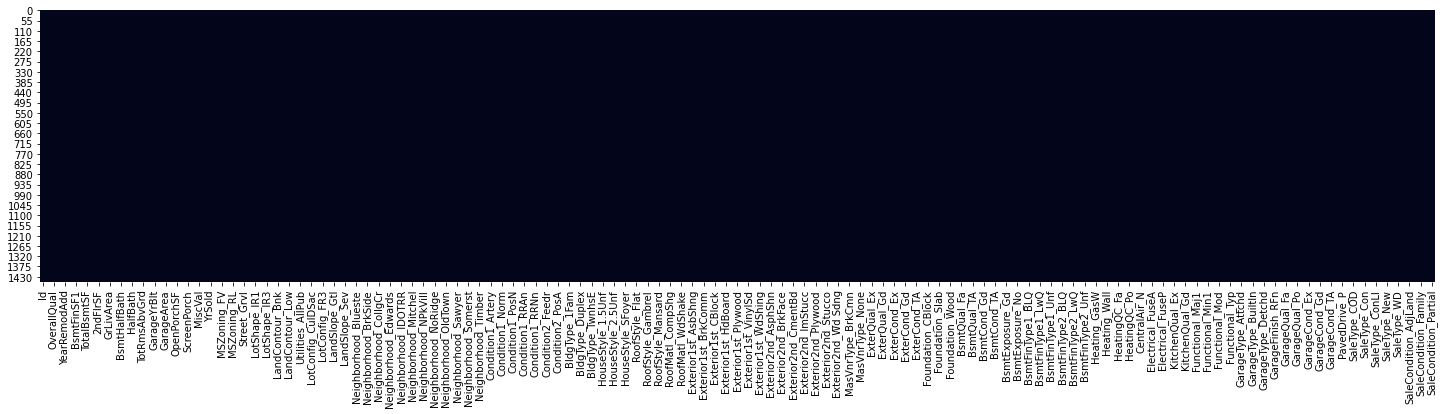

In [127]:
fig,axes = plt.subplots(figsize=(25,5))
sns.heatmap(test_data.isnull(),cbar=False)

In [95]:
test_data = pd.get_dummies(test_data)

In [128]:
test_data.head()

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,0,0,0,1,0,0,0,0,1,0
1,1462,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,0,0,0,1,0,0,0,0,1,0
2,1463,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,0,0,0,1,0,0,0,0,1,0
3,1464,9978,6,1998,1998,20.0,602.0,324.0,926.0,926,...,0,0,0,1,0,0,0,0,1,0
4,1465,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,1280,...,0,0,0,1,0,0,0,0,1,0


In [131]:
test_data.shape

(1459, 249)

In [98]:
np.nan_to_num(test_data)

array([[1.4610e+03, 1.1622e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4620e+03, 1.4267e+04, 6.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4630e+03, 1.3830e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.9170e+03, 2.0000e+04, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.9180e+03, 1.0441e+04, 5.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.9190e+03, 9.6270e+03, 7.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [129]:
rf__testpred = regressor.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [75]:
submission_data =submission_df.to_csv(r'C:\Users\shrik\kaggle\Houseprices\house-prices-advanced-regression-techniques\HousePred_submission.csv', index=False)